In [ ]:
# Via Will's linked to github repo suggestion: https://github.com/robertvazan/fingerprint-datasets -- Tiffs from https://github.com/robertvazan/fingerprint-datasets?tab=readme-ov-file#fvc2004-db3-b 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

print("Imports finished! numpy, PIL and matplotlib.pyplot")
image_path = "DB3_B/101_5.tif"  # See README for whence info. Note: All DB3_B images are '300 by 300' tiffs 
new_png_filename = "fingerprint_101_5.png"

Imports finished! numpy, PIL and matplotlib.pyplot


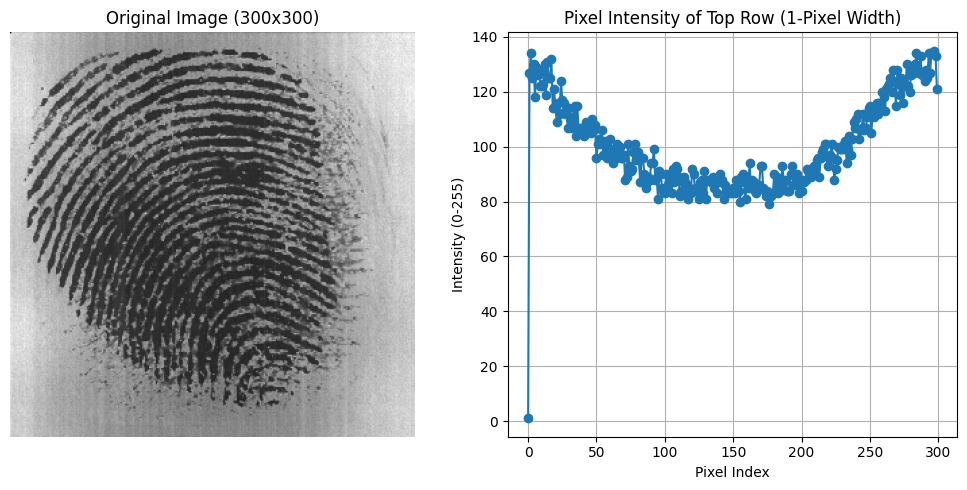

Get image 'DB3_B/101_4.tif'and show it


In [21]:

image = Image.open(image_path)
image_gray = image.convert("L") # Grayscale good! Color bad!
image_array = np.array(image_gray)
# Curious to see a slice of the image as a vector ( each element 0 - 255 ) ) 
top_row_vector = image_array[0, :]
# Flex row! Show the image and the vector - side by side 
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Original Image (300x300)")
ax[0].axis("off")
ax[1].plot(top_row_vector, marker='o', linestyle='-')
ax[1].set_title("Pixel Intensity of Top Row (1-Pixel Width)")
ax[1].set_xlabel("Pixel Index")
ax[1].set_ylabel("Intensity (0-255)")
ax[1].grid()
plt.tight_layout()
plt.show()

print("Get image '{}'and show it".format( image_path ))


In [22]:
# Get the image as a vector, gray scale it, get the mean value and subtract that 
# from each pixel ( to highlight the foreground ) 
# and make a new image from the vector

image_vector = image_array.ravel()
avg_gray_value = np.mean(image_vector)
vector_adjusted = image_vector - avg_gray_value
# Back to the orig 300 by 300 ( or whatever the first image's height width was ) 
image_adjusted_from_vector = vector_adjusted.reshape(image_array.shape)
# 128? Yeah, numpy will have vectorized around 0 as the mean. 
# Because I, as a human, want to see this, I upshift the values from a mean of 0 to a mean of 128. 
image_normalized_from_vector = np.clip(image_adjusted_from_vector + 128, 0, 255).astype(np.uint8)

# L = luminance
new_image_from_vector = Image.fromarray(image_normalized_from_vector, mode="L")




print("Image successfully vectorized and reconstructed.")


Image successfully vectorized and reconstructed.


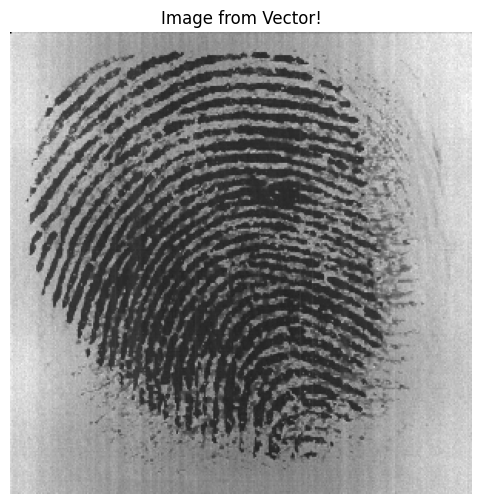

Saved new_png_filename as 'fingerprint_101_4.png'


In [23]:
# SHow it! 
plt.figure(figsize=(6, 6))
plt.imshow(new_image_from_vector, cmap='gray')
plt.title("Image from Vector!")
plt.axis("off")
plt.show()

new_image_from_vector.save(new_png_filename)
print("Saved new_png_filename as '{}'".format(new_png_filename)) 

